In [1]:

import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut


In [3]:
data_set= pd.read_csv('Cars93.csv')
data_set= data_set.drop('Unnamed: 0', axis=1)
data_set.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [4]:
X_data=data_set[['MPG.city', 'MPG.highway', 'EngineSize',    'Horsepower', 'RPM', 'Rev.per.mile',   'Fuel.tank.capacity', 'Passengers', 'Length',   'Wheelbase', 'Width', 'Turn.circle', 'Weight']]
Y_data = data_set['Price'].values.reshape(-1,1)
#alfa=1.0

In [5]:
#retorna el mse
def mse(y_a, y_b):
    d = (y_a - y_b)**2
    return d.mean()
 
#retorna el error de leave one out que es el promedio de los MSE
def loo_error(X, y, a):
    alfa= a
    lasso = sklearn.linear_model.Lasso(alpha=alfa,normalize= True)
    loo = LeaveOneOut()
    #guarda el numero de splits que se pueden hacer
    loo.get_n_splits(X)

    #guarda el MSE
    MSE =[]
    betas=[]
    inter =[]
    for train_index, test_index in loo.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        #print(X_train[train_index])
        lasso.fit(X_train, y_train)
        betas.append(lasso.coef_)
        inter.append(lasso.intercept_)
        MSE.append(mse(y_test, lasso.predict(X_test)))
    
    return np.mean(MSE)



In [6]:
n_times=100
alf = np.linspace(5*10**(-3),5,n_times)
#guade el error leave one out para cada valor de alfa
loo_alf=[]
betas=[]
for i in range(0,n_times):
    lll = loo_error(np.array(X_data), np.array(Y_data), alf[i])
    loo_alf.append(lll)
 
    

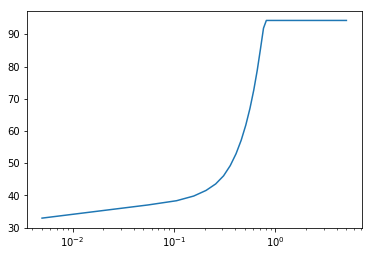

In [7]:
plt.plot(alf,loo_alf)
plt.xscale('log')
#print(np.shape(betas))

array([-0., -0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])